In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ts-temp-1/MLTempDataset.csv
/kaggle/input/ts-temp-1/MLTempDataset1.csv


In [2]:
df = pd.read_csv('/kaggle/input/ts-temp-1/MLTempDataset.csv')

In [3]:
df.head()

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6676 non-null   int64  
 1   Datetime1   6676 non-null   int64  
 2   DAYTON_MW   6676 non-null   float64
 3   Datetime    6676 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 208.8+ KB


In [5]:
df.describe()

,Unnamed: 0,Datetime1,DAYTON_MW
count,6676.000000,6676.000000,6676.000000
mean,3337.500000,11.502846,21.736007
std,1927.339531,6.909701,6.850502
min,0.000000,0.000000,5.350000
25%,1668.750000,6.000000,17.512750
50%,3337.500000,11.000000,23.900000
75%,5006.250000,17.000000,26.367000
max,6675.000000,23.000000,36.500000


In [6]:
df_new = df.drop(['Unnamed: 0','Datetime1'],axis=1)

In [7]:
df_new.Datetime = pd.to_datetime(df_new.Datetime,format='%Y-%m-%d %H:%M:%S')

In [8]:
df_new.index = df_new.Datetime
df_new = df_new.drop(['Datetime'],axis=1)

In [9]:
df_new.head()

,DAYTON_MW
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400


#### Testing for stationarity

<Axes: xlabel='Datetime'>

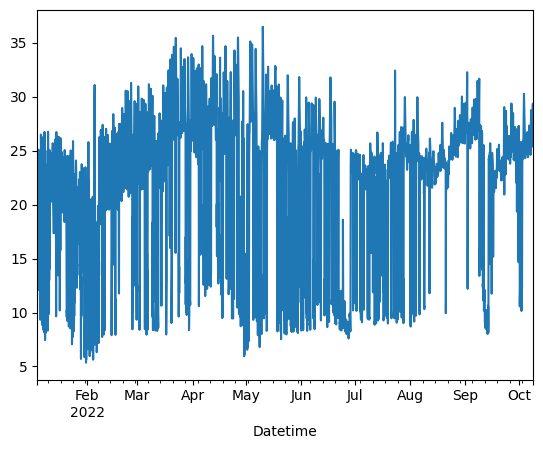

In [10]:
df_new.DAYTON_MW.plot()

<h3> Performing ADF and KPSS tests </h3>

<h4> Starting with the ADF test </h4>

In [11]:
adf_test = adfuller(df_new,autolag='AIC')    

In [12]:
adf_test_results = pd.DataFrame(adf_test[:4],columns = ['Value'])
index=['Test Statistic','P value','# lags','# Observations']

In [13]:
for key,value in adf_test[4].items():
    #adf_test_results = pd.concat([adf_test_results,pd.DataFrame({'Value':value})],ignore_index=True)
    adf_test_results = adf_test_results._append({'Value':value},ignore_index=True)
    index.append(f'Critical value: {key}') 

In [14]:
adf_test_results.reset_index(drop = True)
adf_test_results.index = index

In [15]:
adf_test_results

,Value
Test Statistic,-9.150521e+00
P value,2.694363e-15
# lags,2.500000e+01
# Observations,6.650000e+03
Critical value: 1%,-3.431334e+00
Critical value: 5%,-2.861975e+00
Critical value: 10%,-2.567001e+00


<p><b><h4>Interpretation of the Augmented Dickey Fuller test:</h4></b><br>
    <li>The null hypothesis, H0, states that the data is not stationary.</li>
    <li>The alternate hypothesis, Ha, states that the data is stationary.</li>
<li>To confirm stationarity, we need to compare the Test Statistic and the critical values. If the Test Statistic is less than all the critical values, then we reject the null hypothesis and confirm that the data is stationary.</li>
<li>In this case, the test statistic is -9.1505 and it is less than all the critical values. Hence, it can be concluded that the data is stationary.</p>


<h4> Performing KPSS test </h4>

In [16]:
kpss_test = kpss(df_new,regression='c')
kpss_test_output = pd.DataFrame(kpss_test[0:3],columns=['Value'])
index = ['Test Statistic','P value','# lags']

In [17]:
for key,value in kpss_test[3].items():
    kpss_test_output = kpss_test_output._append({'Value':value},ignore_index=True)
    index.append(f'Critical value: {key}')

kpss_test_output.index = index

In [18]:
kpss_test_output

,Value
Test Statistic,0.695153
P value,0.013986
# lags,46.000000
Critical value: 10%,0.347000
Critical value: 5%,0.463000
Critical value: 2.5%,0.574000
Critical value: 1%,0.739000


<p><b><h4>Interpretation of the KPSS test:</h4></b><br>
    <li>The null hypothesis, H0, states that the data is stationary.</li>
    <li>The alternate hypothesis, Ha, states that the data is not stationary.</li>
<li>To confirm stationarity, we need to compare the Test Statistic and the critical values. If the Test Statistic is less than all the critical values, then we fail to reject the null hypothesis and confirm that the data is stationary.</li>
<li>In this case, the test statistic is 0.695153 and it is greater than most critical values. Hence, it can be concluded that the data is not stationary.</p>


<p><b><h3> Stationarity test summary</h3></b><br>
    <li> ADF test - Data is stationary </li>
    <li> KPSS test - Data is not stationary </li><br>

<b>Hence, it can be concluded that the data includes a trend component, and the removal of trend could result in stationarity. Let us proceed to remove the trend component.</b>

#### Performing differencing